In [24]:
!pip install torch

# Importing Libs & Packs

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

# Data Collection

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [0]:
trainset = datasets.MNIST('E:\Academics\ACS\IG- Summer AI\Week 4', download=True, train=True, transform=transform)
valset = datasets.MNIST('E:\Academics\ACS\IG- Summer AI\Week 4', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Data Exploration

In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


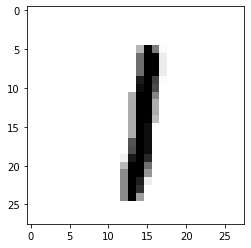

In [29]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

# Model Building

### Structure of Model

In [30]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Loss Calculation

In [0]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probabilities
loss = criterion(logps, labels) # NLL loss

### Backward Propagation

In [0]:
loss.backward()

# Model Training

In [33]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

Epoch 0 - Training loss: 0.6487981805097319
Epoch 1 - Training loss: 0.2934724585349753
Epoch 2 - Training loss: 0.2293947721158327
Epoch 3 - Training loss: 0.18561233255837453
Epoch 4 - Training loss: 0.15477293823708668
Epoch 5 - Training loss: 0.13093757032474349
Epoch 6 - Training loss: 0.11483836716025082
Epoch 7 - Training loss: 0.10217933207035446
Epoch 8 - Training loss: 0.09163032203956421
Epoch 9 - Training loss: 0.08462040768519266
Epoch 10 - Training loss: 0.07567864008444443
Epoch 11 - Training loss: 0.0699380586345269
Epoch 12 - Training loss: 0.06511388077010423
Epoch 13 - Training loss: 0.059819846472609586
Epoch 14 - Training loss: 0.05494422868548481


# Model Testing

In [34]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9743
